In [1]:
from scipy.optimize import differential_evolution
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
from models import PARAMS, Zhao_2021, Mg_M, run, initial_conditions, reset
%config Completer.use_jedi = False
showOriginalModelString = True
# load the samples from the original model
with open('observations.json') as json_file:
    observations = json.load(json_file)
class GSs:
    graph_size = [5,5]
    colors = ['lime' , 'violet', 'yellowgreen', 'peru', 'skyblue']
    legend_font_size = 30
    tick_font_size = 30
    title_font_size = 30
#// read the inferred values and divide it to the given groups 
with open('inferred_params.json') as file:
    inferred_params = json.load(file)
inferred_params_model = {}
for key in PARAMS.free_params_model.keys():
    inferred_params_model[key] = inferred_params[key]

IL1b {'mean': [1950, 1200, 1000, 1700, 1950]}


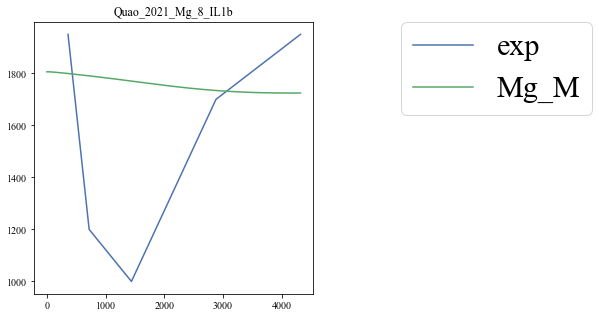

In [2]:
#// plot the simulation vs observations
for study in observations['studies']:
    study_observations = observations[study]
    measurement_scheme = study_observations['measurement_scheme']
    simulation_period = study_observations['experiment_period']*60 # changing from hour to minute
    selections = ['TIME']+ list(measurement_scheme.keys())
    for ID in study_observations['IDs']:
        reset(Mg_M) #reset the model
        for key,value in inferred_params_model.items(): #apply initial conditions
            Mg_M[key] = value
        ID_inputs = study_observations[ID]['inputs']
        ID_observations = study_observations[ID]['expectations']
#         ## apply the boundary condition
        for key,value in ID_inputs.items():
            Mg_M[key] = value
        ID_results = Mg_M.simulate(0,simulation_period,simulation_period,selections=selections)
        for key in ID_observations.keys():
            exp = ID_observations[key]['mean'] # the whole array
            print(key,ID_observations[key])
            sim = ID_results[key]
            
            sim = [i*inferred_params[study] for i in sim]

            fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
            fig.canvas.draw()
            ax = fig.add_subplot(1, 1, 1)
            ax.plot([i*60 for i in measurement_scheme[key]],exp,label='exp')
            ax.plot(range(len(sim)),sim,label='Mg_M')
            ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
            ax.set_title(study+'_'+ID+'_'+key)
            

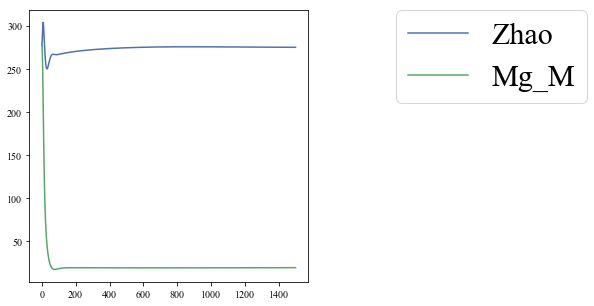

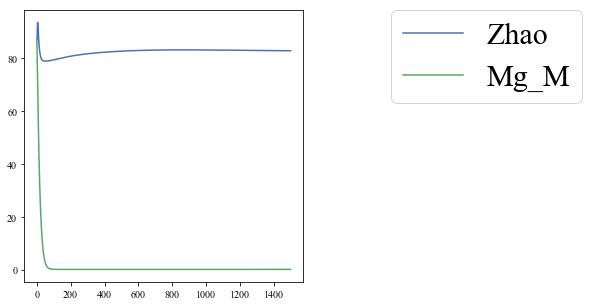

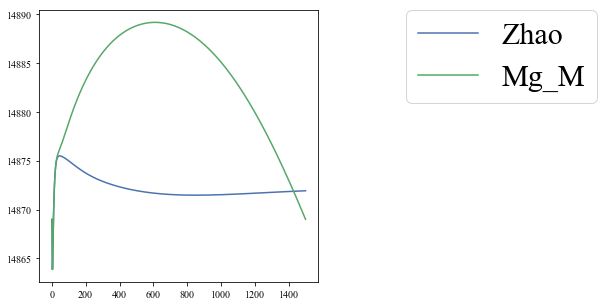

In [3]:
#** plotting vs Zhao
#// update the Mg_M model by applying the inferred values
reset(Mg_M,inferred_params_model)
#// run the Mg_M model
selections = ['TIME']+PARAMS.targets
Mg_M_results = run(Mg_M,duration = PARAMS.duration,targets=selections)
#// run the original model 
Zhao_2021.reset()
Zhao_results = run(Zhao_2021, duration =PARAMS.duration,targets=selections)
for target in PARAMS.targets:
    fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
    fig.canvas.draw()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(Zhao_results['time'],Zhao_results[target],label='Zhao')
    ax.plot(Mg_M_results['time'],Mg_M_results[target],label='Mg_M')
    ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
    #     ax.set_ylim(yrange)
    #     labels = [item.get_text() for item in ax.get_xticklabels()]
    #     ax.set_xticks(ticks = [int(i) for i in x_labels])
    #     ax.set_xticklabels(x_labels_adj)
    #     ax.get_yaxis().set_major_formatter(
    #         matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000, ',')))
#     for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#         label.set_fontname('Times New Roman')
#         label.set_fontsize(GSs.tick_font_size)
#     ax.set_ylabel('yaxis_title',fontdict ={'family':'Times New Roman','size':GSs.title_font_size})
#     ax.set_xlabel('Days',fontdict ={'family':'Times New Roman','size':GSs.title_font_size})


In [4]:

# def sort(observations,targets):
#     exp_tag_results = {}
#     for tag in targets:
#         exp_tag_results[tag] = []
#     for tag in targets:
#         for ID in observations['IDs']:
#             ID_observations = observations[ID]['expectations']
#             exp_tag_results[tag].append(ID_observations[tag])

#     return exp_tag_results
# def bar_positions(targets,IDs):
#     for i in range(len(targets)):
#         x_exp =[float(j) + GSs.delta for j in range(len(IDs))]
#         x_sim =[float(j) - GSs.delta for j in range(len(IDs))]
#     return x_exp,x_sim

# targets = observations[GSs.study]['measurement_scheme'].keys()
# IDs = observations[GSs.study]['IDs']
# exp_tag_results = sort(observations[GSs.study],targets)
# print(exp_tag_results)
# for tag,ii in zip(targets,range(len(targets))):
#     fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
#     fig.canvas.draw()
#     ax = fig.add_subplot(1, 1, 1)
#     for item,jj in zip(exp_tag_results[tag],range(len(IDs))):
#         print(item)
#         means = item['mean']
#         stds = item['std']
#         ax.errorbar(x=range(len(means)),y=means, yerr = stds,
#                     label = IDs[jj]
                 
#                  )
# #     ax.bar(x=x_sim,height=sim_tag_results[tag],width = GSs.bar_width, label = "Sim", facecolor = GSs.colors[ii+1],
# #              edgecolor="black", yerr =  0,
# #              error_kw = dict(capsize= GSs.error_bar_width))
#     ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
# #     ax.set_ylim(yrange)
# #     labels = [item.get_text() for item in ax.get_xticklabels()]
# #     ax.set_xticks(ticks = [int(i) for i in x_labels])
# #     ax.set_xticklabels(x_labels_adj)
# #     ax.get_yaxis().set_major_formatter(
# #         matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x)/1000, ',')))
#     for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#         label.set_fontname('Times New Roman')
#         label.set_fontsize(GSs.tick_font_size)
#     ax.set_ylabel('yaxis_title',fontdict ={'family':'Times New Roman','size':GSs.title_font_size})
#     ax.set_xlabel('Days',fontdict ={'family':'Times New Roman','size':GSs.title_font_size})
    
#     ax.set_title(tag,fontdict ={'family':'Times New Roman','size':GSs.title_font_size, 'fontweight':'bold'})
